# Atif Alnefaie ' project of diabites dataset with Dr.Marim and Dr.Shikh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the dataset 

In [2]:
data = pd.read_csv('Diabetestype.csv')

### Exploratory Data Analysis   EDA

## Head of the dataset 

In [3]:
data.head(5)

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
0,50,6.8,8.8,11.2,7.2,62,Type1,1
1,31,5.2,6.8,10.9,4.2,33,Normal,0
2,32,6.8,8.8,11.2,7.2,62,Type1,1
3,21,5.7,5.8,10.7,4.8,49,Normal,0
4,33,6.8,8.8,11.2,7.2,62,Type1,1


In [4]:
data.sample(10)

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
614,50,6.1,5.7,12.6,8.1,49,Type2,1
693,36,6.9,8.4,11.2,7.2,62,Type2,1
246,41,0.0,7.4,8.7,5.6,41,Normal,0
604,36,5.8,4.2,11.4,8.4,53,Type2,1
835,32,5.8,4.2,11.4,8.4,53,Type2,1
530,22,18.0,7.7,11.0,6.1,36,Normal,0
864,22,14.0,7.4,8.7,5.6,41,Normal,0
839,27,34.0,7.7,11.0,6.1,36,Normal,0
437,28,0.0,5.6,10.2,5.4,32,Normal,0
13,59,6.8,8.2,11.6,7.4,69,Type2,1


### the shape of the dataset

In [5]:
data.shape

(1009, 8)

###  list types of all columns

In [6]:
data.dtypes

Age           int64
BS Fast     float64
BS pp       float64
Plasma R    float64
Plasma F    float64
HbA1c         int64
Type         object
Class         int64
dtype: object

### info of the dataset
## check the null vallues. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1009 non-null   int64  
 1   BS Fast   1009 non-null   float64
 2   BS pp     1009 non-null   float64
 3   Plasma R  1009 non-null   float64
 4   Plasma F  1009 non-null   float64
 5   HbA1c     1009 non-null   int64  
 6   Type      1009 non-null   object 
 7   Class     1009 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 63.2+ KB


### Summary of the dataset 

In [8]:
data.describe()

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Class
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,33.398414,12.571853,6.659167,10.728741,6.136075,43.481665,0.374628
std,11.633364,12.334019,1.205188,1.436979,1.620659,12.067515,0.484267
min,21.000000,0.000000,4.200000,7.900000,3.900000,28.000000,0.000000
25%,24.000000,5.600000,5.800000,10.200000,4.800000,33.000000,0.000000
50%,29.000000,6.700000,6.800000,10.900000,5.600000,40.000000,0.000000
75%,41.000000,20.000000,7.700000,11.400000,7.800000,53.000000,1.000000
max,81.000000,54.000000,8.800000,13.100000,9.100000,69.000000,1.000000


# Data Cleaning :
## check the duplicates .


In [9]:
data.shape

(1009, 8)

In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(623, 8)

In [12]:
data.Type.unique()

array(['Type1', 'Normal', 'Type2'], dtype=object)

In [13]:
 data['Type'] = data['Type'].map({'Normal':0, 'Type1': 1, 'Type2': 2 })

In [14]:
data.head()

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
0,50,6.8,8.8,11.2,7.2,62,1,1
1,31,5.2,6.8,10.9,4.2,33,0,0
2,32,6.8,8.8,11.2,7.2,62,1,1
3,21,5.7,5.8,10.7,4.8,49,0,0
4,33,6.8,8.8,11.2,7.2,62,1,1


# Class count plot

Negative (0):  428
Positive (1):  195


<function matplotlib.pyplot.show(close=None, block=None)>

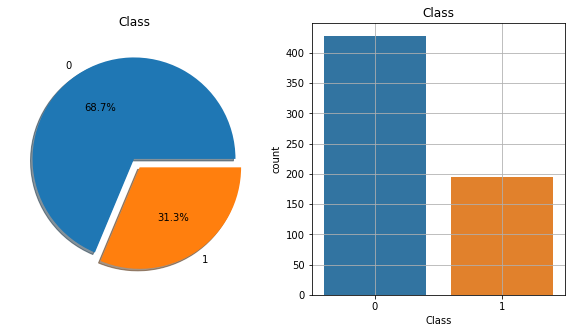

In [15]:
f, ax=plt.subplots(1,2,figsize=(10,5))
data['Class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Class')
ax[0].set_ylabel('')
sns.countplot('Class',data=data,ax=ax[1])
ax[1].set_title('Class')
N,P = data['Class'].value_counts()
print ('Negative (0): ',N)
print ('Positive (1): ',P )
plt.grid()
plt.show

# out of total 623 people. 195 are diabites [positive(1)]
# and 428 are non-diabites [Negative(0)]
# The countplot tells us that the dataset is imblanced.
# as numper of patients who dont have diabetes is
# more than those who have diabetes.
# -------------------------------------------------------------------------------------------





# Histogram of each feature


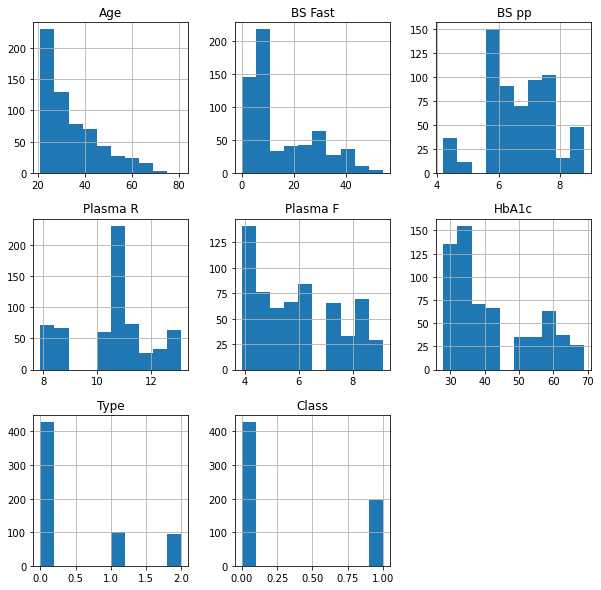

In [16]:
data.hist(bins=10,figsize=(10,10))
plt.show()



## pairplot


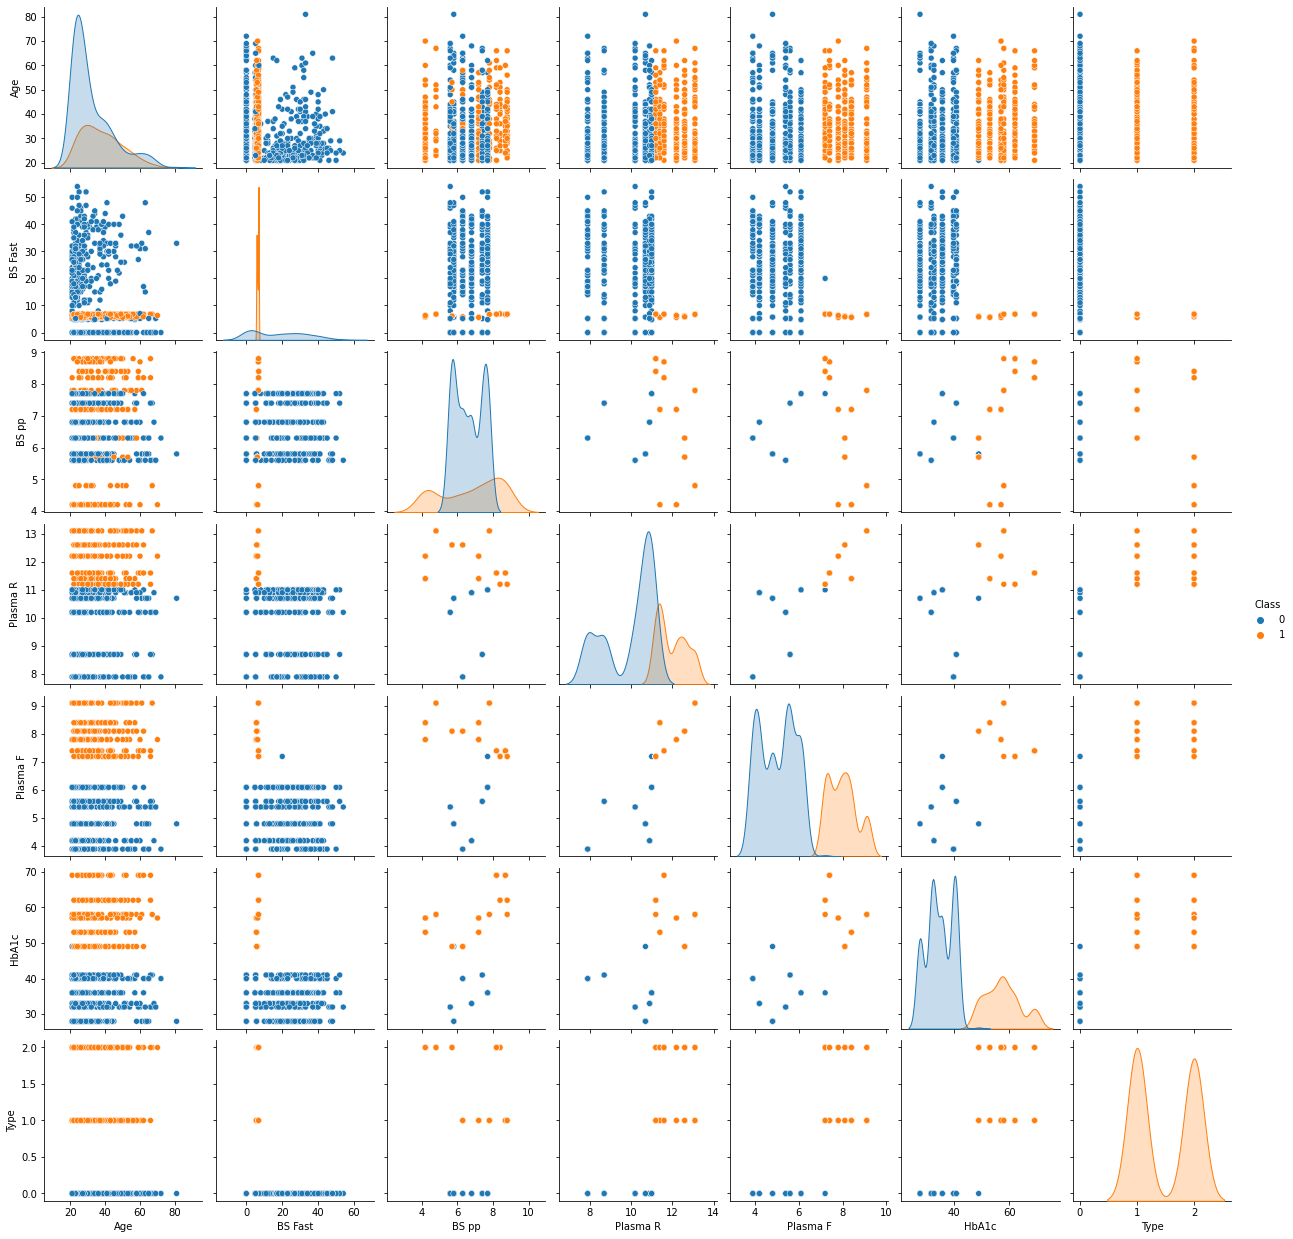

In [17]:
#sns.pairplot() is a great way to create scatterolots between all of your variables.
sns.pairplot(data = data, hue = 'Class')
plt.show()

### CORRELATION ANALYSIS 

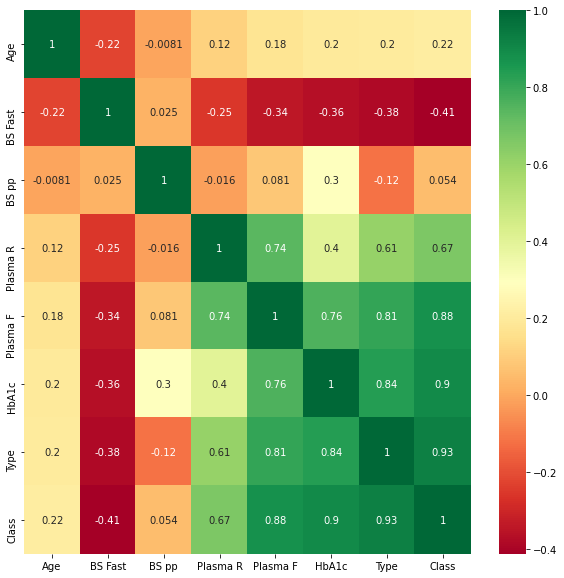

In [18]:
import seaborn as sns 
#get correlation of each features in dataset 
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#----------------------------------------------------------------------

## start to split the data and get Accuracy score 

In [19]:
x = data.iloc[:, [0,1,2,3,4,5,7]].values

In [20]:
y= data.iloc[:, 6].values

In [21]:
x

array([[50. ,  6.8,  8.8, ...,  7.2, 62. ,  1. ],
       [31. ,  5.2,  6.8, ...,  4.2, 33. ,  0. ],
       [32. ,  6.8,  8.8, ...,  7.2, 62. ,  1. ],
       ...,
       [45. , 40. ,  7.4, ...,  5.6, 41. ,  0. ],
       [27. , 34. ,  7.7, ...,  6.1, 36. ,  0. ],
       [21. , 23. ,  7.7, ...,  6.1, 36. ,  0. ]])

In [22]:
y

array([1, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.25, random_state = 0)

In [25]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1,
       1, 2], dtype=int64)

## Apply standard scaler 

In [26]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [27]:
from sklearn.tree import DecisionTreeClassifier 
Classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
Classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
y_pred = Classifier.predict(x_test)

In [29]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1,
       1, 2], dtype=int64)

In [30]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1,
       1, 2], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

In [32]:
cm

array([[110,   0,   0],
       [  0,  20,   0],
       [  0,   0,  26]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
print('Accuracy score is :' ,accuracy_score(y_test, y_pred))

Accuracy score is : 1.0


## THANKS FOR YOUR TIME.

## ATIF EID ALNEFAIE 